In [12]:
import nltk
import numpy as np
import matplotlib.pyplot as plt

* 4: Read in the texts of the State of the Union addresses, using the state_union corpus reader. Count occurrences of men, women, and people in each document. What has happened to the usage of these words over time?

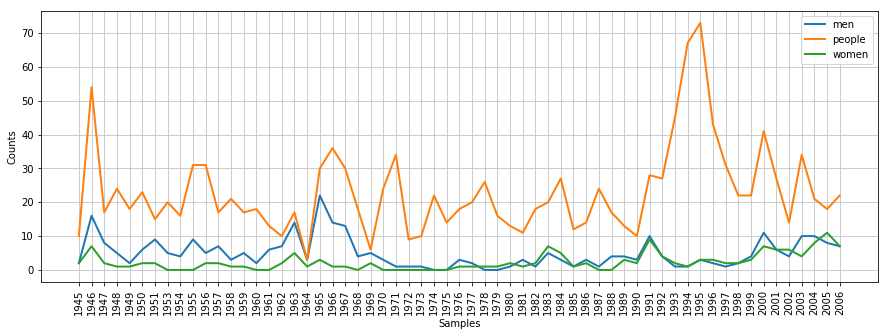

In [13]:
SU = nltk.corpus.state_union
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4]) 
    for fileid in SU.fileids() 
    for w in SU.words(fileid) 
    for target in ['men', 'women', 'people'] 
    if w.lower().startswith(target)
)
plt.figure(figsize=[15,5])
cfd.plot()

* 8: Define a conditional frequency distribution over the Names corpus that allows you to see which initial letters are more frequent for males vs. females (cf. 4.4).

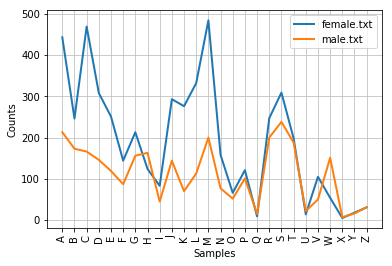

In [16]:
names = nltk.corpus.names
cfd = nltk.ConditionalFreqDist(
    (fileid, name[0])
    for fileid in names.fileids()
    for name in names.words(fileid)
)
cfd.plot()

*  11: Investigate the table of modal distributions and look for other patterns. Try to explain them in terms of your own impressionistic understanding of the different genres. Can you find other closed classes of words that exhibit significant differences across different genres?

In [19]:
brown = nltk.corpus.brown
news_text = brown.words(categories='news')

In [20]:
fdist = nltk.FreqDist(w.lower() for w in news_text)
modals = ['can', 'could', 'may', 'might', 'must', 'will']
for m in modals:
    print(m + ':', fdist[m], end=' ')

can: 94 could: 87 may: 93 might: 38 must: 53 will: 389 

In [21]:
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre)
)
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


* 15: Write a program to find all words that occur at least three times in the Brown Corpus.

In [82]:
def words_k_frequency(words):
    fd = nltk.FreqDist(words)
    cfd = nltk.ConditionalFreqDist(
        (genre, word)
        for genre in brown.categories()
        for word in brown.words(categories=genre)
        if fd[word] > 2
    )
    fd = nltk.FreqDist(words)
    return list(cfd.keys())

In [83]:
words_k_frequency(brown.words())

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

* 16: Write a program to generate a table of lexical diversity scores (i.e. token/type ratios), as we saw in 1.1. Include the full set of Brown Corpus genres (nltk.corpus.brown.categories()). Which genre has the lowest diversity (greatest number of tokens per type)? Is this what you would have expected?

In [84]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

def percentage(count, total):
    return 100 * count / total

In [ ]:
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre)
)
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

* 17: Write a function that finds the 50 most frequently occurring words of a text that are not stopwords.

In [153]:
def k_most_common(text, k, language="english", only_words=False):
    # Convert to set, otherwise slow as ****
    stopwords = set(nltk.corpus.stopwords.words(language)) 
    
    fd = nltk.FreqDist(
        word.lower() for word in text
        if (word.isalpha()) and (word not in stopwords)
    )
    top_k = fd.most_common(k)
    
    if only_words:
        return [x[0] for x in top_k]
    return top_k

In [154]:
common_50 = k_most_common(text1, 50, only_words=True)

* Write a program to print the 50 most frequent bigrams (pairs of adjacent words) of a text, omitting bigrams that contain stopwords.

In [241]:
def isAlpha(tup):
    if not isinstance(tup, tuple):
        return tup.isalpha()
    alphanumeric = True
    for w in tup:
        alphanumeric = alphanumeric and w.isalpha()
    return alphanumeric

def toLowerCase(tup):
    return tuple(map(lambda w: w.lower(), tup))

def isDisjoint(tup, words):
    return set(tup).isdisjoint(words)

In [242]:
def k_most_common_ngrams(text, k, language="english", only_words=False):
    bigrams = nltk.bigrams(text)
    
    # Convert to set, otherwise slow as ****
    stopwords = set(nltk.corpus.stopwords.words(language)) 
    
    fd = nltk.FreqDist(
        tup for tup in bigrams
        if isAlpha(tup) and isDisjoint(tup, stopwords)
    )
    top_k = fd.most_common(k)
    
    if only_words:
        return [x[0] for x in top_k]
    return top_k

In [243]:
k_most_common_ngrams(text1, 50)

[(('Sperm', 'Whale'), 118),
 (('Moby', 'Dick'), 83),
 (('old', 'man'), 80),
 (('White', 'Whale'), 74),
 (('I', 'say'), 71),
 (('Captain', 'Ahab'), 61),
 (('sperm', 'whale'), 55),
 (('said', 'I'), 52),
 (('I', 'thought'), 44),
 (('I', 'know'), 43),
 (('Right', 'Whale'), 38),
 (('I', 'could'), 36),
 (('But', 'I'), 36),
 (('I', 'think'), 34),
 (('ye', 'see'), 34),
 (('thought', 'I'), 32),
 (('I', 'would'), 32),
 (('Captain', 'Peleg'), 32),
 (('cried', 'Ahab'), 32),
 (('white', 'whale'), 31),
 (('I', 'must'), 29),
 (('one', 'hand'), 28),
 (('I', 'saw'), 27),
 (('I', 'see'), 24),
 (('I', 'shall'), 24),
 (('cried', 'Stubb'), 23),
 (('one', 'side'), 22),
 (('every', 'one'), 21),
 (('let', 'us'), 20),
 (('never', 'mind'), 20),
 (('I', 'suppose'), 20),
 (('OF', 'THE'), 18),
 (('years', 'ago'), 18),
 (('I', 'never'), 18),
 (('I', 'mean'), 18),
 (('New', 'Bedford'), 18),
 (('At', 'last'), 18),
 (('said', 'Stubb'), 18),
 (('I', 'tell'), 17),
 (('cried', 'Starbuck'), 17),
 (('something', 'like'), 1

In [187]:
c = 0
for tupl in bigrams:
    for w in tupl:
        if w: c+=1

In [226]:
xxxx = tuple(map(lambda x: x%2 != 12, range(10)))

In [228]:
xxxx

(True, True, True, True, True, True, True, True, True, True)

In [232]:
tuple(map(lambda x: x%2 != 12, xxxx))

(True, True, True, True, True, True, True, True, True, True)

In [206]:
[(w1,w2) for (w1,w2) in nltk.bigrams(text1) if w1.isalpha() and w2.isalpha()]

[('Moby', 'Dick'),
 ('Dick', 'by'),
 ('by', 'Herman'),
 ('Herman', 'Melville'),
 ('Supplied', 'by'),
 ('by', 'a'),
 ('a', 'Late'),
 ('Late', 'Consumptive'),
 ('Consumptive', 'Usher'),
 ('Usher', 'to'),
 ('to', 'a'),
 ('a', 'Grammar'),
 ('Grammar', 'School'),
 ('The', 'pale'),
 ('pale', 'Usher'),
 ('threadbare', 'in'),
 ('in', 'coat'),
 ('and', 'brain'),
 ('I', 'see'),
 ('see', 'him'),
 ('him', 'now'),
 ('He', 'was'),
 ('was', 'ever'),
 ('ever', 'dusting'),
 ('dusting', 'his'),
 ('his', 'old'),
 ('old', 'lexicons'),
 ('lexicons', 'and'),
 ('and', 'grammars'),
 ('with', 'a'),
 ('a', 'queer'),
 ('queer', 'handkerchief'),
 ('mockingly', 'embellished'),
 ('embellished', 'with'),
 ('with', 'all'),
 ('all', 'the'),
 ('the', 'gay'),
 ('gay', 'flags'),
 ('flags', 'of'),
 ('of', 'all'),
 ('all', 'the'),
 ('the', 'known'),
 ('known', 'nations'),
 ('nations', 'of'),
 ('of', 'the'),
 ('the', 'world'),
 ('He', 'loved'),
 ('loved', 'to'),
 ('to', 'dust'),
 ('dust', 'his'),
 ('his', 'old'),
 ('old', '